# Car accidents in Berlin

## How did the amount of car accidents develop over the years in Berlin?

- Set up requirements, import packages
- Load data with datenguide
- Plot results

### Set up requirements, import packages

Assumes to use code from local, parent directory as in the repository folder structure.

In [1]:
%load_ext autoreload
%autoreload

import os
if not os.path.basename(os.getcwd()) == "datenguide-python":
    os.chdir("..")
    
    
from datenguidepy.query_helper import get_regions, get_statistics
from datenguidepy import Query
import pandas as pd
import matplotlib
%matplotlib inline

pd.set_option('display.max_colwidth', 150)

### Load data with datenguide

In [2]:
# get the ID of Berlin by querying all states by name
get_regions().query("name == 'Berlin'")

name  level parent
region_id                      
11         Berlin  nuts1     DG
110        Berlin  nuts2     11
11000      Berlin  nuts3    110

In [3]:
# find out the name of the desired statistic
get_statistics().query('long_description.str.contains("Unfälle")', engine='python')

short_description  \
statistic                                                       
AI1303                   Straßenverkehrsunfälle je 10.000 Kfz   
AI1302             Straßenverkehrsunfälle je 10.000 Einwohner   
AI1304     Getötete bei Straßenverkehrsunfällen je 100.000 EW   
AI1305     Verletzte bei Straßenverkehrsunfällen je 100.000EW   
VER001                                    Unfälle (insgesamt)   
VER002                            Unfälle mit Personenschaden   
VER005          Schwerwiegende Unfälle mit Sachschäden i.e.S.   
VER006     Sons.Sachschadensunf.unter d.Einfl.berausch.Mittel   
VER056                 Schwerwiegende Unfälle mit Sachschaden   

                                                                                                                                                long_description  
statistic                                                                                                                                                         
AI1303     wiki\n==Straßenverkehrsunfälle je 10.000 Kfz==\n===Aussage===\nDer Indikator ist ein Maßstab für die Unfallhäufigkeit im\nStraßenverkehr. Die Kenn...  
AI1302     wiki\n==Straßenverkehrsunfälle je 10.000 Einwohner==\n===Aussage===\nDer Indikator ist ein Maßstab für die Unfallhäufigkeit im\nStraßenverkehr. Di...  
AI1304     wiki\n==Getötete bei Straßenverkehrsunfällen je 100.000\nEinwohner==\n===Aussage===\nDer Indikator ist ein Maßstab für die bei\nStraßenverkehrsunf...  
AI1305     wiki\n==Verletzte bei Straßenverkehrsunfällen je 100.000\nEinwohner==\n===Aussage===\nDer Indikator ist ein Maßstab für die bei\nStraßenverkehrsun...  
VER001     Unfälle (ingesamt)\n \n \nErläuterung für folgende Statistik(en):\n46241 Statistik der Straßenverkehrsunfälle\n \nBegriffsinhalt:\nStraßenverkehrs...  
VER002     Unfälle mit Personenschaden\n \n \nErläuterung für folgende Statistik(en):\n46241 Statistik der Straßenverkehrsunfälle\n \nBegriffsinhalt:\nUnfäll...  
VER005     Schwerwiegende Unfälle mit Sachschäden im engeren Sinne\n \n \nErläuterung für folgende Statistik(en):\n46241 Statistik der Straßenverkehrsunfälle...  
VER006     Alkoholunfälle ohne Personenschaden und schwerwiegende\nSachschäden\n \nUnfälle, bei denen alle beteiligten Kfz noch fahrbereit\nwaren und gleichz...  
VER056     Schwerwiegende Unfälle mit Sachschaden\n \n \nErläuterung für folgende Statistik(en):\n46241 Statistik der Straßenverkehrsunfälle\n \nBegriffsinha...

In [6]:
get_statistics().query('statistic.str.contains("AI1302")', engine = 'python')

short_description  \
statistic                                               
AI1302     Straßenverkehrsunfälle je 10.000 Einwohner   

                                                                                                                                                long_description  
statistic                                                                                                                                                         
AI1302     wiki\n==Straßenverkehrsunfälle je 10.000 Einwohner==\n===Aussage===\nDer Indikator ist ein Maßstab für die Unfallhäufigkeit im\nStraßenverkehr. Di...

In [7]:
q = Query.region('11')

f1 = q.add_field('AI1302')
f2 = q.add_field('AI1304')

In [8]:
f1.get_info()

kind:
OBJECT

description:
Straßenverkehrsunfälle je 10.000 Einwohner

arguments:
year: LIST of type SCALAR(Int)

statistics: LIST of type ENUM(AI1302Statistics)
enum values:
R99910: Regionalatlas Deutschland

fields:
id: Interne eindeutige ID
year: Jahr des Stichtages
value: Wert
source: Quellenverweis zur GENESIS Regionaldatenbank

enum values:
None


In [9]:
f2.get_info()

kind:
OBJECT

description:
Getötete bei Straßenverkehrsunfällen je 100.000 EW

arguments:
year: LIST of type SCALAR(Int)

statistics: LIST of type ENUM(AI1304Statistics)
enum values:
R99910: Regionalatlas Deutschland

fields:
id: Interne eindeutige ID
year: Jahr des Stichtages
value: Wert
source: Quellenverweis zur GENESIS Regionaldatenbank

enum values:
None


### Plot results

In [10]:
results = q.results()
results

id    name  year  AI1302  AI1304     AI1302_source_title_de  \
0   11  Berlin  1995    67.0     4.1  Regionalatlas Deutschland   
1   11  Berlin  1995    67.0     4.1  Regionalatlas Deutschland   
2   11  Berlin  1995    67.0     4.1  Regionalatlas Deutschland   
3   11  Berlin  1995    67.0     4.1  Regionalatlas Deutschland   
4   11  Berlin  2000    57.1     2.6  Regionalatlas Deutschland   
5   11  Berlin  2000    57.1     2.6  Regionalatlas Deutschland   
6   11  Berlin  2000    57.1     2.6  Regionalatlas Deutschland   
7   11  Berlin  2000    57.1     2.6  Regionalatlas Deutschland   
8   11  Berlin  2005    47.0     2.0  Regionalatlas Deutschland   
9   11  Berlin  2005    47.0     2.0  Regionalatlas Deutschland   
10  11  Berlin  2005    47.0     2.0  Regionalatlas Deutschland   
11  11  Berlin  2005    47.0     2.0  Regionalatlas Deutschland   
12  11  Berlin  2006    47.7     2.2  Regionalatlas Deutschland   
13  11  Berlin  2006    47.7     2.2  Regionalatlas Deutschland   
14  11  Berlin  2006    47.7     2.2  Regionalatlas Deutschland   
15  11  Berlin  2006    47.7     2.2  Regionalatlas Deutschland   
16  11  Berlin  2007    49.2     1.6  Regionalatlas Deutschland   
17  11  Berlin  2007    49.2     1.6  Regionalatlas Deutschland   
18  11  Berlin  2007    49.2     1.6  Regionalatlas Deutschland   
19  11  Berlin  2007    49.2     1.6  Regionalatlas Deutschland   
20  11  Berlin  2008    49.9     1.6  Regionalatlas Deutschland   
21  11  Berlin  2008    49.9     1.6  Regionalatlas Deutschland   
22  11  Berlin  2008    49.9     1.6  Regionalatlas Deutschland   
23  11  Berlin  2008    49.9     1.6  Regionalatlas Deutschland   
24  11  Berlin  2009    45.8     1.4  Regionalatlas Deutschland   
25  11  Berlin  2009    45.8     1.4  Regionalatlas Deutschland   
26  11  Berlin  2009    45.8     1.4  Regionalatlas Deutschland   
27  11  Berlin  2009    45.8     1.4  Regionalatlas Deutschland   
28  11  Berlin  2010    41.9     1.3  Regionalatlas Deutschland   
29  11  Berlin  2010    41.9     1.3  Regionalatlas Deutschland   
30  11  Berlin  2010    41.9     1.3  Regionalatlas Deutschland   
31  11  Berlin  2010    41.9     1.3  Regionalatlas Deutschland   
32  11  Berlin  2011    48.9     1.6  Regionalatlas Deutschland   
33  11  Berlin  2011    48.9     1.6  Regionalatlas Deutschland   
34  11  Berlin  2011    48.9     1.6  Regionalatlas Deutschland   
35  11  Berlin  2011    48.9     1.6  Regionalatlas Deutschland   
36  11  Berlin  2012    48.1     1.3  Regionalatlas Deutschland   
37  11  Berlin  2012    48.1     1.3  Regionalatlas Deutschland   
38  11  Berlin  2012    48.1     1.3  Regionalatlas Deutschland   
39  11  Berlin  2012    48.1     1.3  Regionalatlas Deutschland   
40  11  Berlin  2013    45.7     1.1  Regionalatlas Deutschland   
41  11  Berlin  2013    45.7     1.1  Regionalatlas Deutschland   
42  11  Berlin  2013    45.7     1.1  Regionalatlas Deutschland   
43  11  Berlin  2013    45.7     1.1  Regionalatlas Deutschland   
44  11  Berlin  2014    47.7     1.5  Regionalatlas Deutschland   
45  11  Berlin  2014    47.7     1.5  Regionalatlas Deutschland   
46  11  Berlin  2014    47.7     1.5  Regionalatlas Deutschland   
47  11  Berlin  2014    47.7     1.5  Regionalatlas Deutschland   
48  11  Berlin  2015    48.0     1.4  Regionalatlas Deutschland   
49  11  Berlin  2015    48.0     1.4  Regionalatlas Deutschland   
50  11  Berlin  2015    48.0     1.4  Regionalatlas Deutschland   
51  11  Berlin  2015    48.0     1.4  Regionalatlas Deutschland   
52  11  Berlin  2016    46.5     1.6  Regionalatlas Deutschland   
53  11  Berlin  2016    46.5     1.6  Regionalatlas Deutschland   
54  11  Berlin  2016    46.5     1.6  Regionalatlas Deutschland   
55  11  Berlin  2016    46.5     1.6  Regionalatlas Deutschland   
56  11  Berlin  2017    46.0     1.0  Regionalatlas Deutschland   
57  11  Berlin  2018    46.6     1.2  Regionalatlas Deutschland   

   AI1302_source_valid_from AI1302_source_periodic

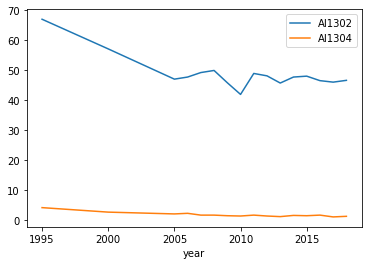

In [11]:
results.set_index('year')[['AI1302', 'AI1304']].plot()

### Same but interactive plot with plotly

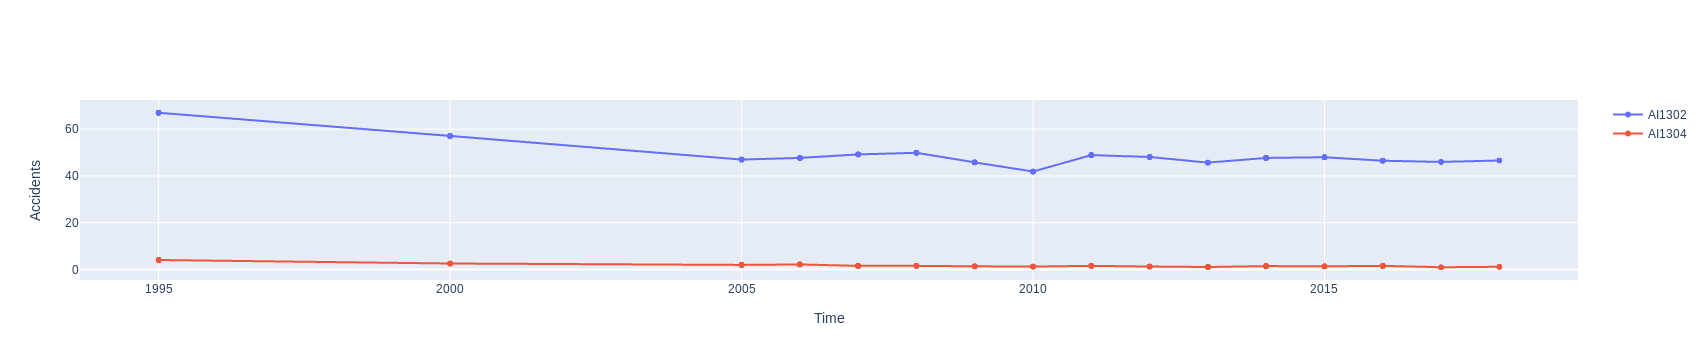

In [12]:
import plotly.graph_objs as go

df = results.set_index('year')

fig = go.Figure()
fig.add_trace(
    go.Scattergl(
        x=df.index,
        y=df['AI1302'],
        mode="lines+markers",
        name="AI1302",
    )
)

fig.add_trace(
    go.Scattergl(
        x=df.index,
        y=df['AI1304'],
        mode="lines+markers",
        name="AI1304",
    )
)

fig.update_xaxes(title_text="Time")
fig.update_yaxes(title_text="Accidents")

fig.show()

Both, accidents per 10.000 inhabitants (AI1302), as well as killed people per 100.000 inhabitants (AI1304) decreased significantly especially between 1995 and 2005.